In [1]:
import pandas as pd
import numpy as np

### Task 1: Data Acquisition and Preparation

In [2]:
df = pd.read_csv('Fish.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df['Species'].unique()
# df['Weight'].unique()
# df['Length1'].unique()
# df['Length2'].unique()
# df['Length3'].unique()
# df['Height'].unique()
# df['Width'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
encoder = OneHotEncoder(sparse_output=False)  # no need for .toarray()
encoded = encoder.fit_transform(df[["Species"]])

result = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(["Species"]))


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns=["Species"])
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 2: Exploratory Data Analysis and Feature Engineering

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
features = ["Length1", "Length2", "Length3", "Height", "Width"]

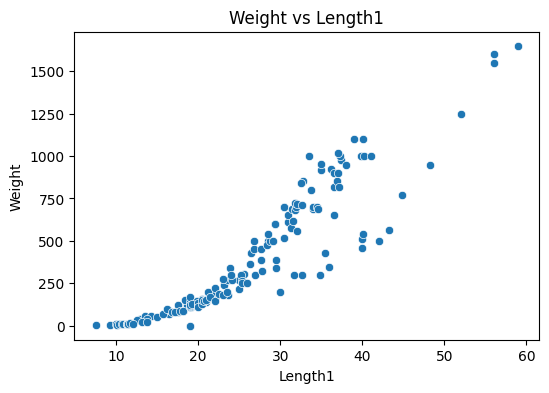

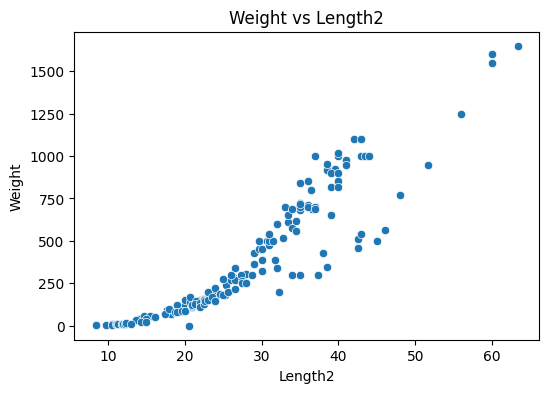

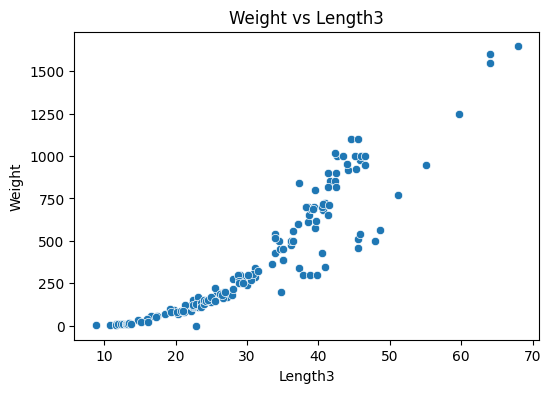

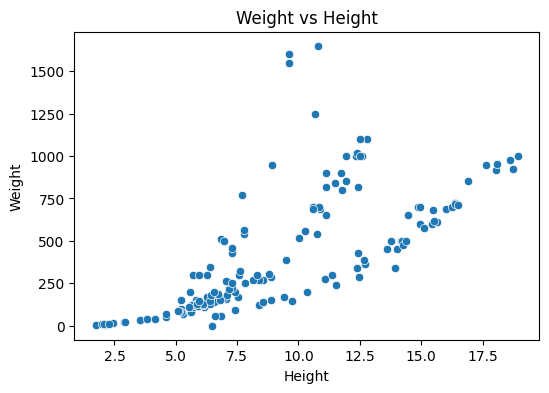

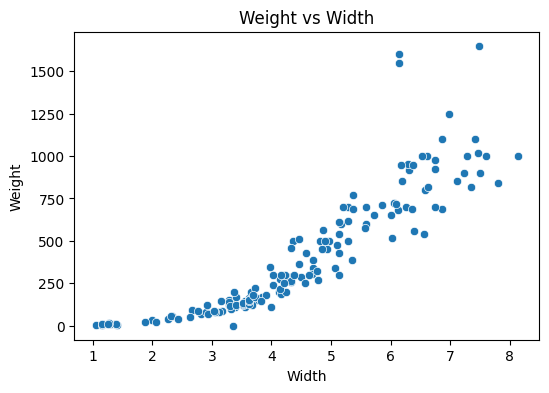

In [13]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=feature, y="Weight")
    plt.title(f"Weight vs {feature}")
    plt.show()

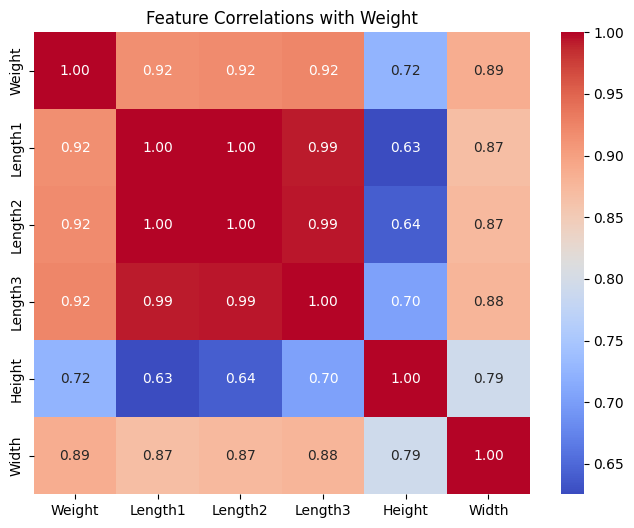

In [14]:
plt.figure(figsize=(8,6))
corr = df[["Weight"] + features].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations with Weight")
plt.show()

In [15]:
Q1 = df["Weight"].quantile(0.25)
Q3 = df["Weight"].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df["Weight"] < Q1 - 1.5 * IQR) | (df["Weight"] > Q3 + 1.5 * IQR)]
print(outliers)


    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


In [16]:
from scipy import stats

In [17]:
z_scores = stats.zscore(df["Weight"])
outliers = df[abs(z_scores) > 3]
print(outliers)


    Species  Weight  Length1  Length2  Length3  Height  Width
142    Pike  1600.0     56.0     60.0     64.0   9.600  6.144
143    Pike  1550.0     56.0     60.0     64.0   9.600  6.144
144    Pike  1650.0     59.0     63.4     68.0  10.812  7.480


In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df[["Weight"]] = scaler.fit_transform(df[["Weight"]])


In [19]:
df["Length1_Width"] = df["Length1"] * df["Width"]
df["Length2_Width"] = df["Length2"] * df["Width"]
df["Length3_Width"] = df["Length3"] * df["Width"]
df["Height_Width"]  = df["Height"] * df["Width"]
df["Length1_Height"] = df["Length1"] * df["Height"]
df["Length2_Height"] = df["Length2"] * df["Height"]
df["Length3_Height"] = df["Length3"] * df["Height"]

In [20]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width,Length1_Width,Length2_Width,Length3_Width,Height_Width,Length1_Height,Length2_Height,Length3_Height
0,Bream,-0.058491,23.2,25.4,30.0,11.5200,4.0200,93.26400,102.10800,120.60000,46.310400,267.26400,292.60800,345.60000
1,Bream,0.032075,24.0,26.3,31.2,12.4800,4.3056,103.33440,113.23728,134.33472,53.733888,299.52000,328.22400,389.37600
2,Bream,0.126415,23.9,26.5,31.1,12.3778,4.6961,112.23679,124.44665,146.04871,58.127387,295.82942,328.01170,384.94958
3,Bream,0.169811,26.3,29.0,33.5,12.7300,4.4555,117.17965,129.20950,149.25925,56.718515,334.79900,369.17000,426.45500
4,Bream,0.296226,26.5,29.0,34.0,12.4440,5.1340,136.05100,148.88600,174.55600,63.887496,329.76600,360.87600,423.09600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Smelt,-0.492075,11.5,12.2,13.4,2.0904,1.3936,16.02640,17.00192,18.67424,2.913181,24.03960,25.50288,28.01136
155,Smelt,-0.489811,11.7,12.4,13.5,2.4300,1.2690,14.84730,15.73560,17.13150,3.083670,28.43100,30.13200,32.80500
156,Smelt,-0.492075,12.1,13.0,13.8,2.2770,1.2558,15.19518,16.32540,17.33004,2.859457,27.55170,29.60100,31.42260
157,Smelt,-0.477925,13.2,14.3,15.2,2.8728,2.0672,27.28704,29.56096,31.42144,5.938652,37.92096,41.08104,43.66656


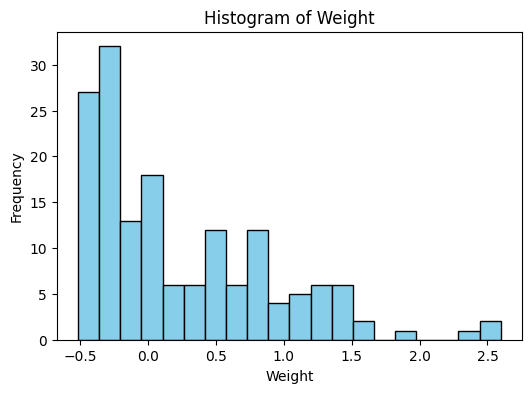

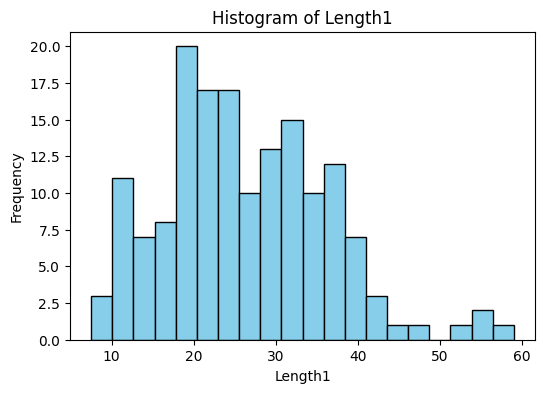

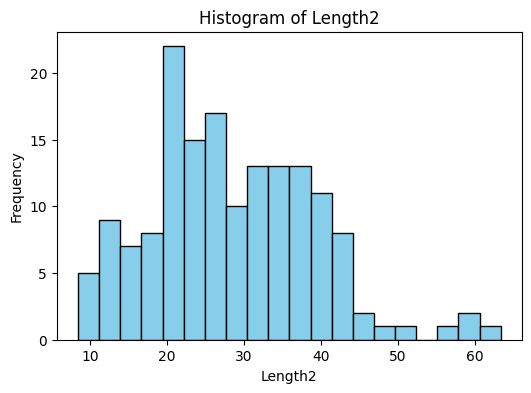

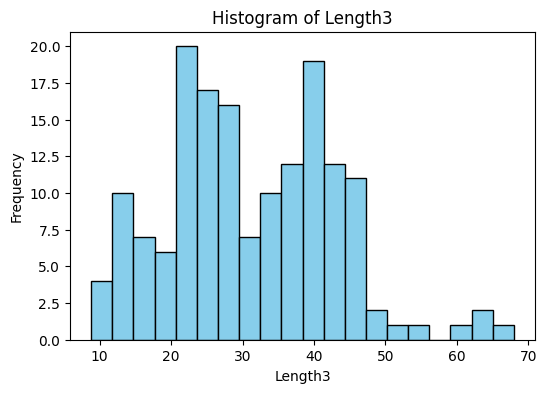

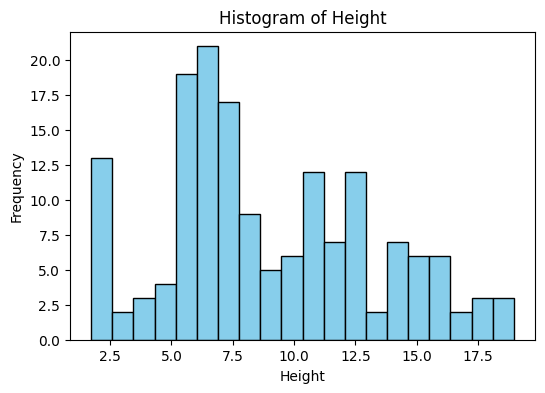

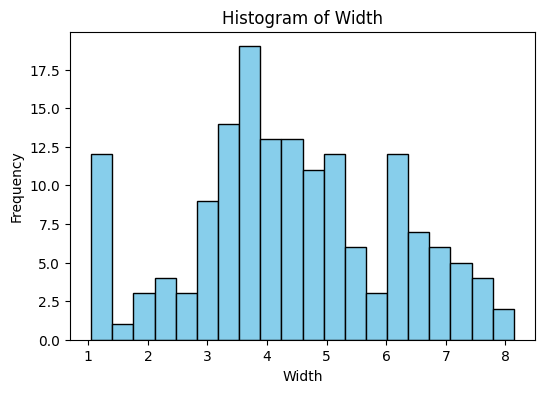

In [21]:
import matplotlib.pyplot as plt

features = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"]

for feature in features:
    plt.figure(figsize=(6,4))
    plt.hist(df[feature], bins=20, color='skyblue', edgecolor='black')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


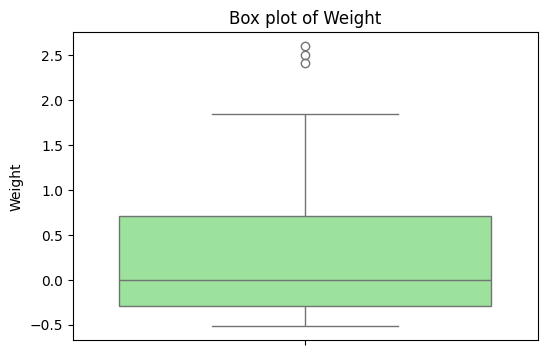

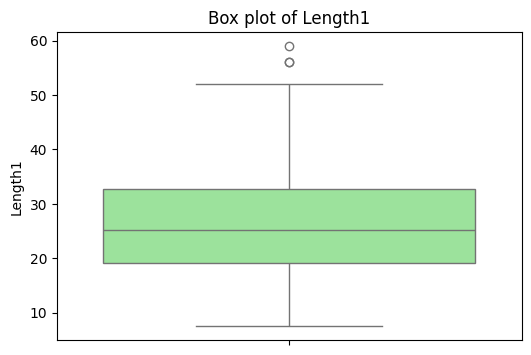

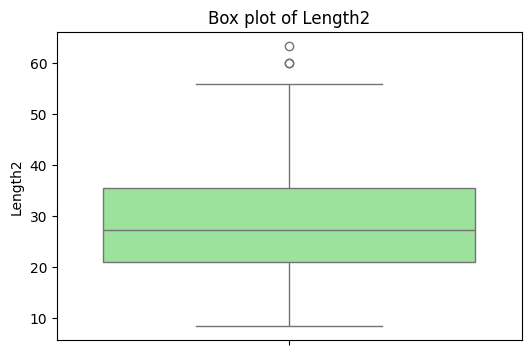

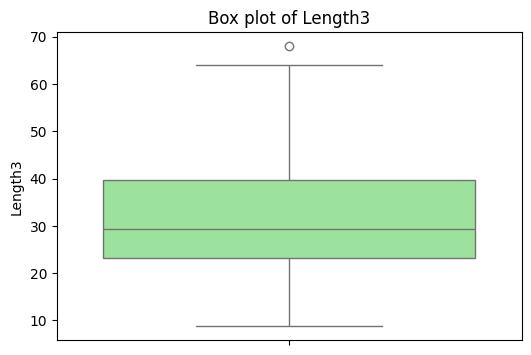

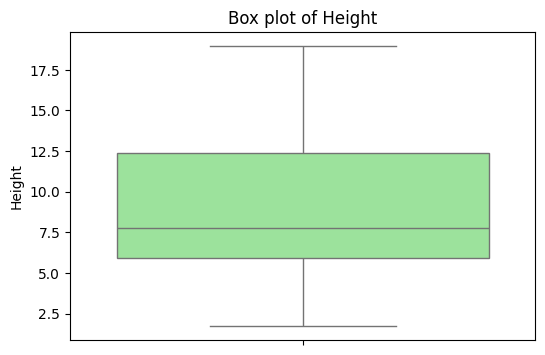

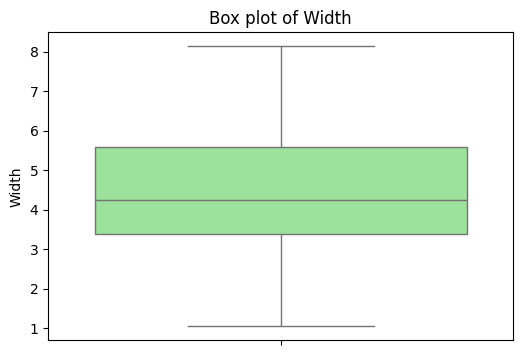

In [22]:
import seaborn as sns

for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f"Box plot of {feature}")
    plt.show()


### Task 3: Model Development and Comparison

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
X = df[["Length1", "Length2", "Length3", "Height", "Width"]]
y = df["Weight"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
r2_lin = r2_score(y_test, y_pred_lin)



In [36]:
ridge_reg = Ridge(alpha=1.0)  # alpha can be tuned
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)


In [37]:
lasso_reg = Lasso(alpha=0.1)  # alpha can be tuned
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)


In [38]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)


In [39]:
print("Linear Regression RMSE:", rmse_lin, "R2:", r2_lin)
print("Ridge Regression RMSE:", rmse_ridge, "R2:", r2_ridge)
print("Lasso Regression RMSE:", rmse_lasso, "R2:", r2_lasso)
print("Polynomial Regression RMSE:", rmse_poly, "R2:", r2_poly)



Linear Regression RMSE: 0.2442932657499634 R2: 0.8821430593048696
Ridge Regression RMSE: 0.24470873714651487 R2: 0.8817418380417656
Lasso Regression RMSE: 0.2586300446950369 R2: 0.8679038613502261
Polynomial Regression RMSE: 0.12874295250907217 R2: 0.967267505578682
